In [1]:
from IPython.display import Image
Image(url="dataset_description.jpeg", width=500, height=300)

In [43]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# PRE-PROCESSING

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.rename(columns={'ApplicantIncome': 'Applicant_Income','CoapplicantIncome':'CoApplicant_Income','LoanAmount':'Loan_Amount'}, inplace=True)

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#total income
df["Total_Income"]=df['Applicant_Income']+df['CoApplicant_Income']

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [13]:
#Finding Null Values
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
CoApplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
Total_Income           0
dtype: int64

In [14]:
#Filling the null values with the mean of that particular column.

In [15]:
df['Loan_Amount']=df['Loan_Amount'].fillna(df['Loan_Amount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [16]:
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
CoApplicant_Income     0
Loan_Amount            0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Total_Income           0
dtype: int64

In [17]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [18]:
# As the variable 'Gender' does not play an important role, therefore filling its missing values 
#with the mode of the column.

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [19]:
#Similarly for other categorical variables.
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [20]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
CoApplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

# EDA

In [21]:
#Visualising through graphs for categorical features using "countplot" attribute of seaborn module.

<Axes: xlabel='Gender', ylabel='count'>

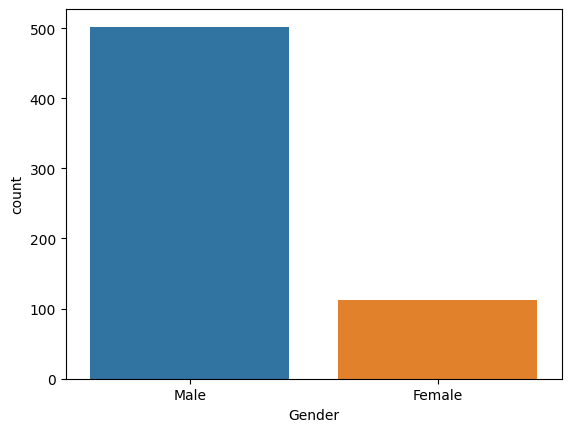

In [22]:
sns.countplot(data=df,x="Gender")

<Axes: xlabel='Self_Employed', ylabel='count'>

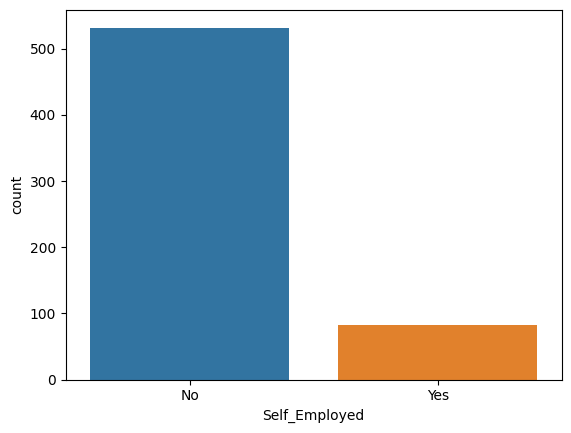

In [23]:
sns.countplot(data=df,x="Self_Employed")

<Axes: xlabel='Property_Area', ylabel='count'>

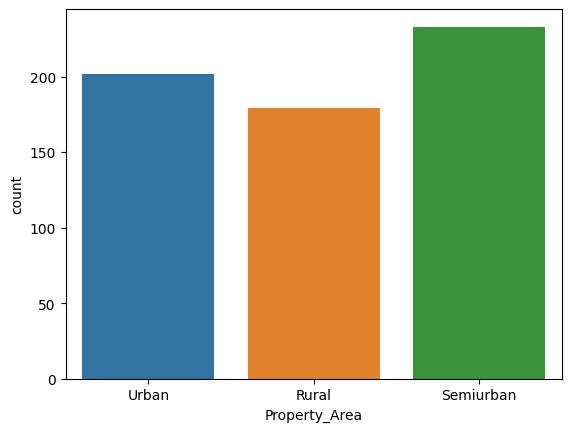

In [24]:
sns.countplot(data=df,x="Property_Area")

<Axes: xlabel='Loan_Status', ylabel='count'>

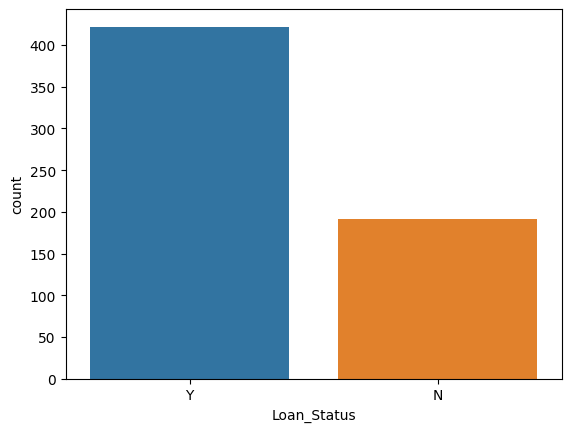

In [25]:
sns.countplot(data=df,x="Loan_Status")

In [26]:
#Visualising through graphs for numerical features using "displot" attribute of seaborn module.

/var/folders/6f/n2krpnkx289d2x2f4d7k82yc0000gn/T/ipykernel_2332/832177378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Applicant_Income'])


<Axes: xlabel='Applicant_Income', ylabel='Density'>

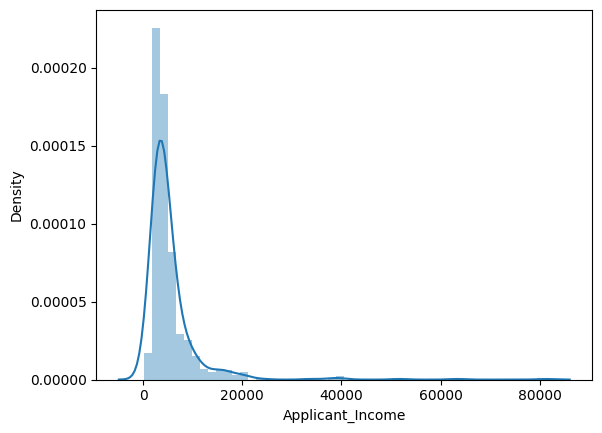

In [27]:
sns.distplot(df['Applicant_Income'])

In [28]:
# So from the above graph, we can conclude that most of the applicants are in left side therefore
# the graph is left skewed. Thus, it is not suitable for training the model.

In [29]:
#Therefore applying log transformation to the attribure to make it a normal distribution.

df['Applicant_Income']=np.log(df['Applicant_Income'])

/var/folders/6f/n2krpnkx289d2x2f4d7k82yc0000gn/T/ipykernel_2332/832177378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Applicant_Income'])


<Axes: xlabel='Applicant_Income', ylabel='Density'>

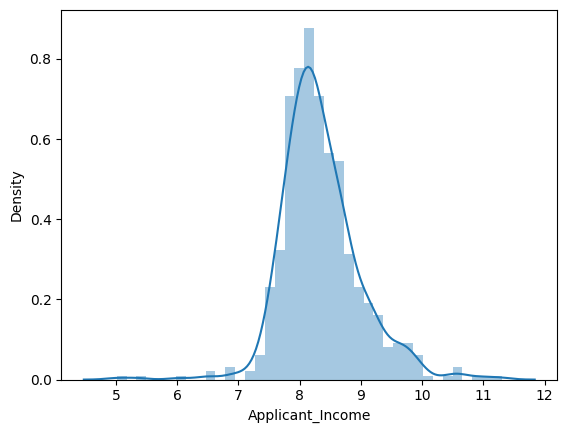

In [30]:
sns.distplot(df['Applicant_Income'])

In [31]:
#Now we can see that the grpah is in normalized form.

/var/folders/6f/n2krpnkx289d2x2f4d7k82yc0000gn/T/ipykernel_2332/2329619802.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount'])


<Axes: xlabel='Loan_Amount', ylabel='Density'>

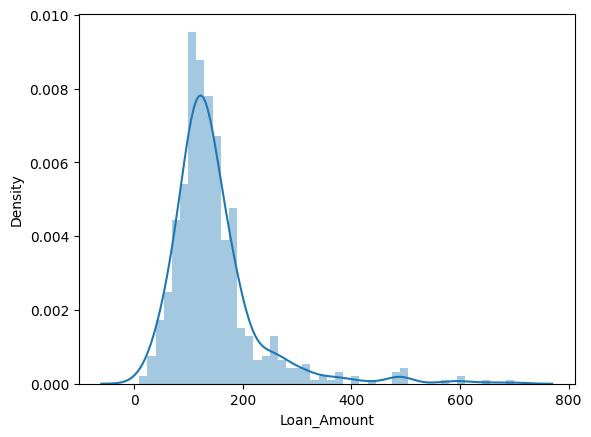

In [32]:
sns.distplot(df['Loan_Amount'])

In [33]:
#Therefore applying log transformation to the attribure to make it a normal distribution.

df['Loan_Amount']=np.log(df['Loan_Amount'])

/var/folders/6f/n2krpnkx289d2x2f4d7k82yc0000gn/T/ipykernel_2332/2329619802.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount'])


<Axes: xlabel='Loan_Amount', ylabel='Density'>

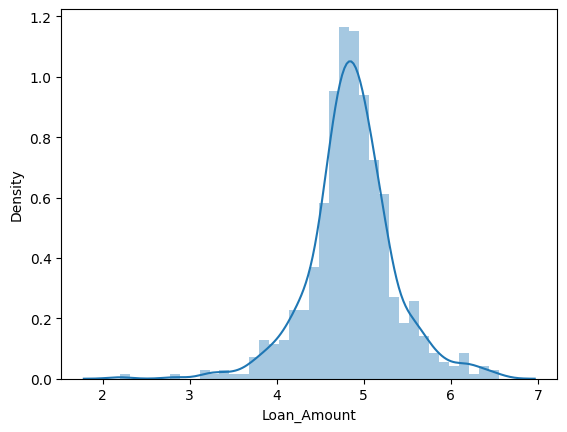

In [34]:
sns.distplot(df['Loan_Amount'])

/var/folders/6f/n2krpnkx289d2x2f4d7k82yc0000gn/T/ipykernel_2332/1582373303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Income'])


<Axes: xlabel='Total_Income', ylabel='Density'>

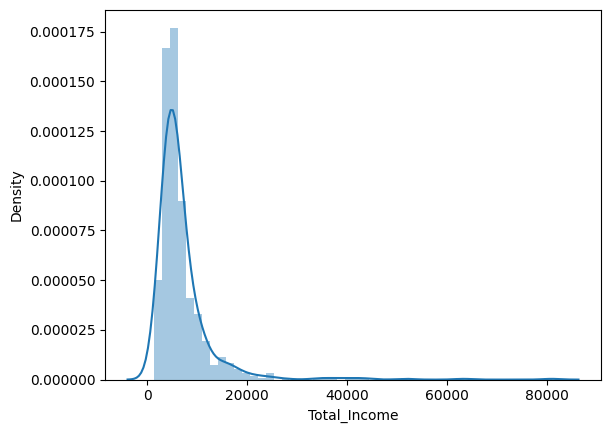

In [35]:
sns.distplot(df['Total_Income'])

In [36]:
df['Total_Income']=np.log(df['Total_Income'])

/var/folders/6f/n2krpnkx289d2x2f4d7k82yc0000gn/T/ipykernel_2332/1582373303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Income'])


<Axes: xlabel='Total_Income', ylabel='Density'>

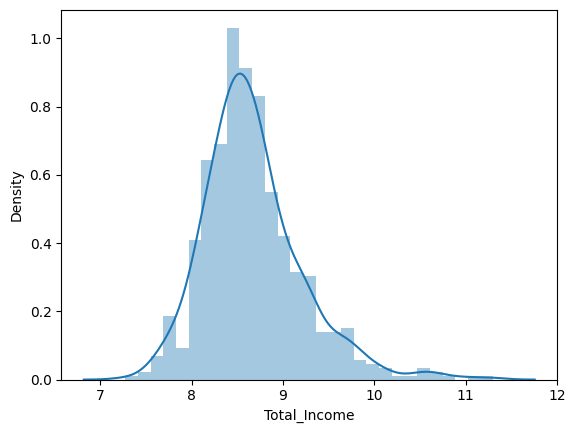

In [37]:
sns.distplot(df['Total_Income'])

# Creating new attribute with respect to log

In [38]:
df['Applicant_Income_Log']=np.log(df['Applicant_Income'])
df['CoApplicant_Income_Log']=np.log(df['CoApplicant_Income'])
df['Loan_Amount_Log']=np.log(df['Loan_Amount'])
df['Loan_Amount_Term_Log']=np.log(df['Loan_Amount_Term'])
df['Total_Income_Log']=np.log(df['Total_Income'])

/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Applicant_Income_Log,CoApplicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,360.0,1.0,Urban,Y,8.674026,2.160333,-inf,1.606719,5.886104,2.160333
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,N,8.714568,2.131810,7.318540,1.579397,5.886104,2.164996
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban,Y,8.006368,2.080237,-inf,1.432618,5.886104,2.080237
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban,Y,8.505323,2.061368,7.765569,1.566007,5.886104,2.140692
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban,Y,8.699515,2.163267,-inf,1.599137,5.886104,2.163267


# Coorelation Matrix

In [40]:
corr=df.corr()

/var/folders/6f/n2krpnkx289d2x2f4d7k82yc0000gn/T/ipykernel_2332/1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

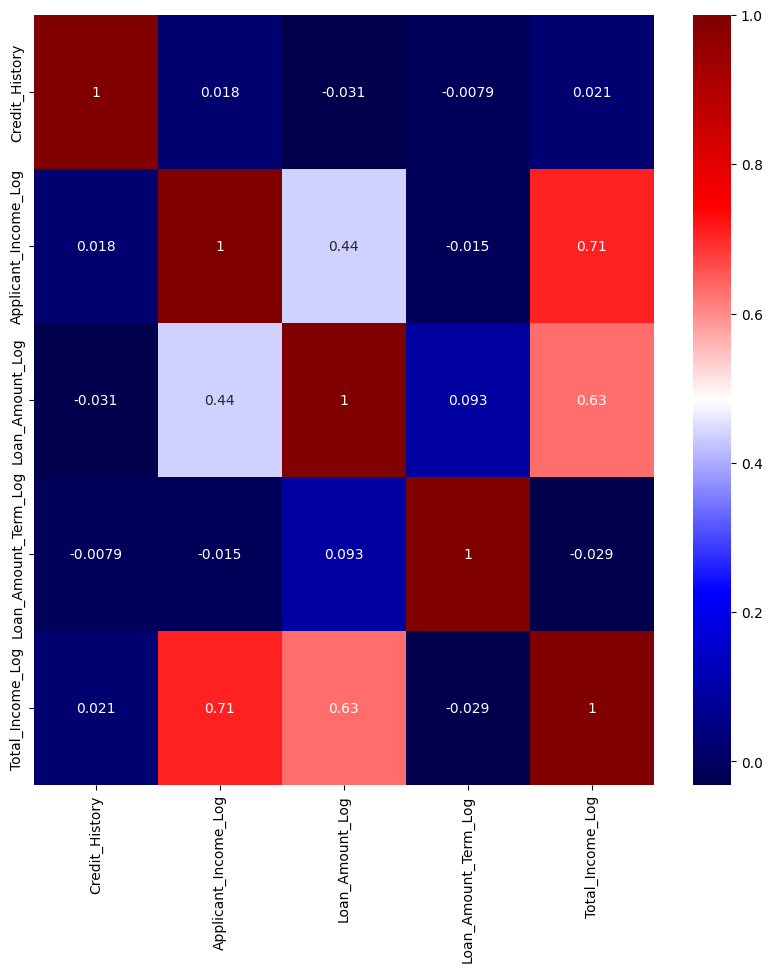

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="seismic")

In [58]:
#We will keep the log terms for training the model.

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Applicant_Income_Log,CoApplicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,360.0,1.0,Urban,Y,8.674026,2.160333,-inf,1.606719,5.886104,2.160333
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,N,8.714568,2.131810,7.318540,1.579397,5.886104,2.164996
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban,Y,8.006368,2.080237,-inf,1.432618,5.886104,2.080237
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban,Y,8.505323,2.061368,7.765569,1.566007,5.886104,2.140692
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban,Y,8.699515,2.163267,-inf,1.599137,5.886104,2.163267


In [62]:
# Dropping unecessary columns
cols=['Applicant_Income','CoApplicant_Income','Loan_Amount','Total_Income','Loan_Amount_Term','Loan_ID','CoApplicant_Income_Log']
df=df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333,1.606719,5.886104,2.160333
1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.131810,1.579397,5.886104,2.164996
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237,1.432618,5.886104,2.080237
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.061368,1.566007,5.886104,2.140692
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267,1.599137,5.886104,2.163267


/var/folders/6f/n2krpnkx289d2x2f4d7k82yc0000gn/T/ipykernel_2332/3305613070.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

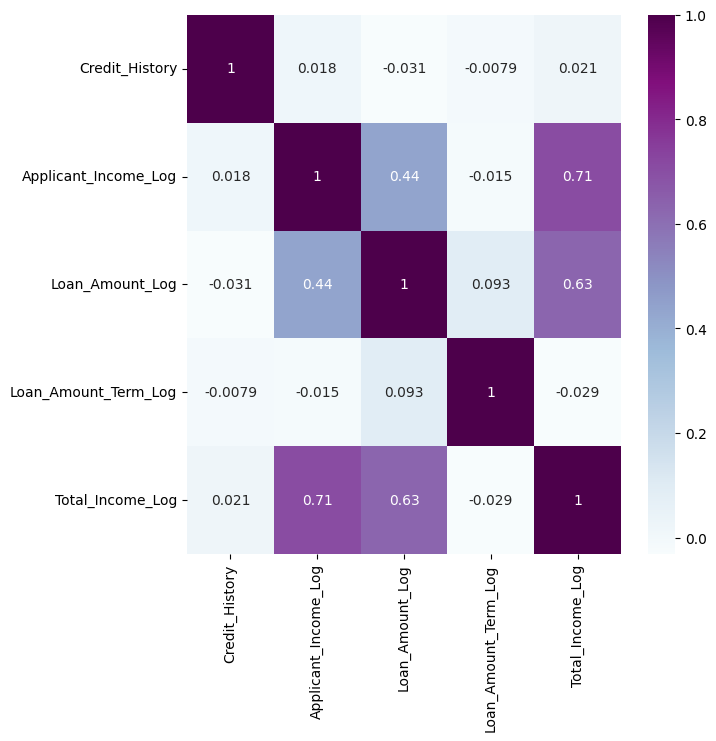

In [68]:
corr=df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap="BuPu")

# Label Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [85]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,2.160333,1.606719,5.886104,2.160333
1,1,1,1,0,0,1.0,0,0,2.131810,1.579397,5.886104,2.164996
2,1,1,0,0,1,1.0,2,1,2.080237,1.432618,5.886104,2.080237
3,1,1,0,1,0,1.0,2,1,2.061368,1.566007,5.886104,2.140692
4,1,0,0,0,0,1.0,2,1,2.163267,1.599137,5.886104,2.163267


# Train Test Split

In [86]:
X=df.drop(columns=['Loan_Status'],axis=1)
Y=df['Loan_Status']

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

# Model Training

In [88]:
from sklearn.neural_network import MLPClassifier

In [90]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), 
                           max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [91]:
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [92]:
classifier.score(X_train,y_train)

0.8205128205128205

# Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix

In [96]:
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 27,  38],
       [  2, 118]])

<Axes: >

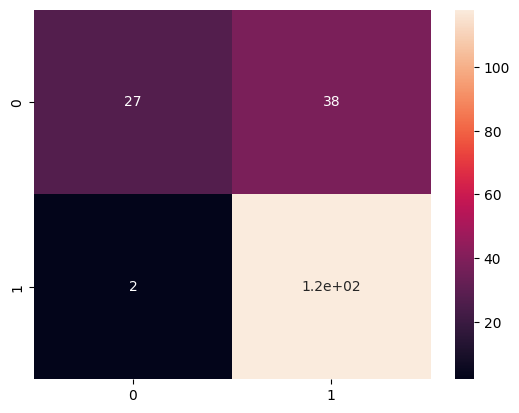

In [97]:
sns.heatmap(cm,annot=True)